## Check if the moments of R are calculated correctly

In [31]:
import numpy as np
from scipy.integrate import quad

def approximate_integral(d, alpha, beta):
    integrand = lambda r: r**d * np.exp(-alpha * (r - beta)**2)
    result, error = quad(integrand, 0, np.inf)
    return result, error

# Example usage
d = 2
alpha = 1.0
beta = 1.0
integral_value = approximate_integral(d, alpha, beta)
print(f"The approximate value of the integral is: {integral_value}")


The approximate value of the integral is: (2.633516307983492, 1.739384184486733e-08)


In [32]:
from r_dist import R

r_var = R(d, alpha, beta)

print(r_var.compute_Id(order=d))


2.6335163079834985


In [51]:
def test_integral_functions(num_tests, upper_limit=10):
    for _ in range(num_tests):
        # Generate random integers for d, alpha, and beta in the range 1 to 100
        d = np.random.randint(1, upper_limit)
        alpha = np.random.uniform(0, 1)
        beta = np.random.uniform(0, 1)
        
        # Compute the integral using both functions
        result1, error = approximate_integral(d, alpha, beta)
        print(f"error: {error}")
        
        r_var = R(d, alpha, beta)
        result2 = r_var.compute_Id(order=d)
        
        # Compare the results
        print(f"Test with d={d}, alpha={alpha}, beta={beta}")
        print(f"Result from first function: {result1}")
        print(f"Result from second function: {result2}")
        print(f"Difference: {abs(result1 - result2)}\n")
        
        # Check if the results are sufficiently close (tolerance can be adjusted)
        if not np.isclose(result1, result2, atol=1e-5):
            print("Results are not the same within the tolerance limit.")
            print()
            print(f"alpha={alpha}, beta={beta}, d={d}")
            print(f"Result from first function: {result1}")
            print(f"Result from second function: {result2}")
            return False
        
    print("All tests passed. The functions give the same results within the tolerance limit.")
    return True

In [52]:
test_integral_functions(num_tests=10, upper_limit=10)

error: 1.166159632689506e-09
Test with d=3, alpha=0.6224180543188361, beta=0.329457021973809
Result from first function: 2.4872156344470344
Result from second function: 2.4872156344470358
Difference: 1.3322676295501878e-15

error: 2.3700760315445324e-08
Test with d=2, alpha=0.21315527565484027, beta=0.38404099107849876
Result from first function: 6.606302421702439
Result from second function: 6.606302421702438
Difference: 8.881784197001252e-16

error: 5.4873082013922334e-08
Test with d=8, alpha=0.8206439165569758, beta=0.06328950105836573
Result from first function: 17.903524572292547
Result from second function: 17.903524572292547
Difference: 0.0

error: 4.240672244011603e-09
Test with d=5, alpha=0.6457481043465666, beta=0.4350793532480288
Result from first function: 11.15887419992618
Result from second function: 11.158874199926192
Difference: 1.2434497875801753e-14

error: 7.361722278222987e-10
Test with d=4, alpha=0.9890464103597681, beta=0.3410291650222246
Result from first functio

True

In [76]:
r_var = R(1, 3.0, 0.27)


print(r_var.compute_Id(order=d+1) / r_var.compute_Id(order=d))

0.787494831284444


In [78]:
r_var = R(1, 3.0, 0.27)

r_var.update_moments()

print()
print(r_var.first_moment)

AttributeError: 'R' object has no attribute 'alpha'

In [80]:
from dataset import Synthetic_data

μ_1 = np.array([0.75,0.25])
μ_2 = np.array([0.25, 0.75])

μ_1 = μ_1 / np.linalg.norm(μ_1)
μ_2 = μ_2 / np.linalg.norm(μ_2)

cov_1 = np.array([[0.1, 0.05], [0.05, 0.1]])
cov_2 = np.array([[0.1, 0.05], [0.05, 0.1]])

gamma_prior_cov = np.array([0.1])

ν = cov_1[1,1]

# α = 7
# β = 2
# prior = lambda : beta.rvs(α, β)

prior = lambda : 0.5

ds = Synthetic_data(μ_1, μ_2, prior, N_t=1000)

# ds.dataset_vi(max_iter=3)   

ds.gaussian_mm_init()

assumed_dof = ds.sigma_star_vars[0].dof
print(f"==>> assumed_dof: {assumed_dof}")

print(f"==>> ds.gamma_vars[0].prior_cov: {ds.gamma_vars[0].prior_cov}")

print(f"==>> ds.sigma_star_vars[0].prior_scale: {ds.sigma_star_vars[0].prior_scale}")
print(f"==>> ds.sigma_star_vars[0].scale: {ds.sigma_star_vars[0].scale}")

for i in range(0,len(ds.z_vars)):
    ds.z_vars[i].probs = [0.0, 1.0] if i % 2 == 0 else [1.0, 0.0]


ds.means_vars[0].prior_cov = cov_1
ds.means_vars[0].mean = μ_1
ds.means_vars[0].cov = cov_1

ds.gamma_vars[0].prior_cov = np.array([gamma_prior_cov / np.sqrt(ν)])
ds.gamma_vars[0].mean = np.array([cov_1[0, 1]]) / np.sqrt(ν)
ds.gamma_vars[0].cov = np.array([gamma_prior_cov / ν])
ds.gamma_vars[0].nu = cov_1[-1,-1]

ds.sigma_star_vars[0].prior_scale = np.array([cov_1[0,0] * (assumed_dof - ds.d)])
ds.sigma_star_vars[0].scale = np.array([cov_1[0,0] - ds.gamma_vars[0].mean ** 2])
ds.sigma_star_vars[0].nu = cov_1[-1,-1]                


ds.means_vars[1].prior_cov = cov_2[1,1]
ds.means_vars[1].mean = μ_2
ds.means_vars[1].cov = cov_2

ds.gamma_vars[1].prior_cov = np.array([gamma_prior_cov / np.sqrt(ν)])
ds.gamma_vars[1].mean = np.array([cov_2[0, 1]]) / np.sqrt(ν)
ds.gamma_vars[1].cov = np.array([gamma_prior_cov / ν])
ds.gamma_vars[1].nu = cov_2[-1,-1]

ds.sigma_star_vars[1].prior_scale = np.array([cov_2[0,0] - ds.gamma_vars[0].mean ** 2])
ds.sigma_star_vars[1].scale = np.array([[cov_2[0,0] * (assumed_dof - ds.d)]])
ds.sigma_star_vars[1].nu = cov_2[-1,-1]

full_sigma_inv_estimates = [np.linalg.inv(cov_mat) for cov_mat in [cov_1, cov_2]]

for i, (r_var, label) in enumerate(zip(ds.r_vars, ds.gmm.labels)):
    curr_data = ds.normed_embds[i]

    # r_var.alpha = np.random.uniform(3.0, 3.5)
    # r_var.beta = np .random.uniform(0.2, 0.3)
    # r_var.update_moments()



    r_var.alpha = 0.5 * np.matmul(curr_data.T, np.matmul(full_sigma_inv_estimates[label], curr_data))

    beta_numerator = np.matmul(curr_data.T, np.matmul(full_sigma_inv_estimates[label], ds.means_vars[label].mean)) 
    beta_denom = np.matmul(curr_data.T, np.matmul(full_sigma_inv_estimates[label], curr_data))

    r_var.beta = beta_numerator / beta_denom

    r_var.update_moments()
    
    # initialise phi variables

for k in range(ds.K):
    # count number of labels in group k
    num_labels = sum([1 for lab in ds.gmm.labels if lab == k])
    ds.phi_var.conc[k] = num_labels + ds.phi_var.prior_conc[k]


ds.dataset_vi(max_iter=3, run_init=False)


sigma inv estimates: [array([[2308.52384872,  789.46377181],
       [ 789.46377181,  281.73765424]]), array([[ 267.82250586,  742.30308344],
       [ 742.30308344, 2151.8604076 ]])]
==>> assumed_dof: 5
==>> ds.gamma_vars[0].prior_cov: [[0.01719058]]
==>> ds.sigma_star_vars[0].prior_scale: [[0.00625049]]
==>> ds.sigma_star_vars[0].scale: [[0.00129953]]
Initial values:
                  
                    μ_0_mean: [0.9486833  0.31622777]
                    μ_0_cov: [[0.1  0.05]
 [0.05 0.1 ]]

                    μ_1_mean: [0.31622777 0.9486833 ]
                    μ_1_cov: [[0.1  0.05]
 [0.05 0.1 ]]

                 _____________________________________________________________________

                    sigma_0_scale: [[0.075]]
                    sigma_0_dof: 5

                    sigma_1_scale: [[0.3]]
                    sigma_1_dof: 5

                _____________________________________________________________________

                    gamma_0_mean: [0.15811388]
       

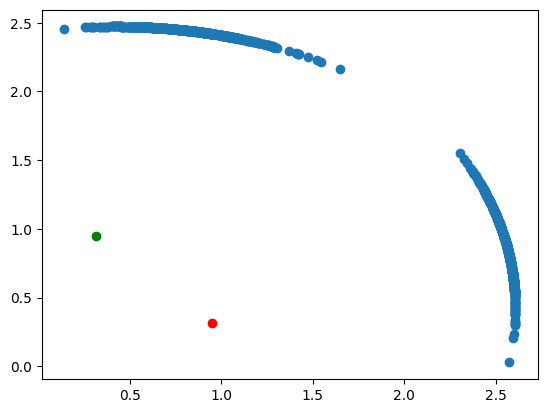

In [88]:
import numpy as np
import matplotlib.pyplot as plt



points_vec = []
for i in range(0,len(ds.z_vars)):
    # mean_vec = ds.means_vars[np.argmax(ds.z_vars.probs)].mean
    normed_embd = ds.normed_embds[i]
    r_i_moment = ds.r_vars[i].first_moment
    points_vec.append(normed_embd * r_i_moment)

    # Remove the middle dimension from each array in points_vec
points_vec = [np.squeeze(arr) for arr in points_vec]
points_vec = np.array(points_vec)

x_points = points_vec[:, 0]
y_points = points_vec[:, 1]

plt.scatter(x=x_points, y=y_points)

mean_1 = ds.means_vars[0].mean
mean_2 = ds.means_vars[1].mean

plt.scatter(x=mean_1[0], y=mean_1[1], color='red')
plt.scatter(x=mean_2[0], y=mean_2[1], color='green')


plt.show()


    


    